# Data Analysis of a JSON output from the Unity Experiment Application

Given JSON data, a variety of analytical techniques will be applied in order to interpret the given data

## Rotor Derivations

In [11]:
from sympy import symbols
from galgebra.ga import Ga
from galgebra.printer import Format

Format(Fmode = False, Dmode = True)
s4coords = (x,y,z,w) = symbols('x y z w', real=True)
s4 = Ga('e',
g=[1,1,1,1],
coords=s4coords)

### Equations used in Rotor.py

In [8]:
# Rotation of a vector using a Rotor

# Vector
a = s4.mv('a','vector')

# Rotor
b = s4.mv('b','bivector')
s = s4.mv('s', 'scalar')
p = s4.mv('p', 'pseudo')
rotor = b + s + p

(rotor * a * rotor.rev()).Fmt(3)

 (2*a__w*b__xw*s + 2*a__w*b__xy*b__yw + 2*a__w*b__xz*b__zw + 2*a__w*b__yz*p__xyzw - a__x*b__xw**2 - a__x*b__xy**2 - a__x*b__xz**2 + a__x*b__yw**2 + a__x*b__yz**2 + a__x*b__zw**2 - a__x*p__xyzw**2 + a__x*s**2 - 2*a__y*b__xw*b__yw + 2*a__y*b__xy*s - 2*a__y*b__xz*b__yz + 2*a__y*b__zw*p__xyzw - 2*a__z*b__xw*b__zw + 2*a__z*b__xy*b__yz + 2*a__z*b__xz*s - 2*a__z*b__yw*p__xyzw)*e_x
 + (-2*a__w*b__xw*b__xy - 2*a__w*b__xz*p__xyzw + 2*a__w*b__yw*s + 2*a__w*b__yz*b__zw - 2*a__x*b__xw*b__yw - 2*a__x*b__xy*s - 2*a__x*b__xz*b__yz - 2*a__x*b__zw*p__xyzw + a__y*b__xw**2 - a__y*b__xy**2 + a__y*b__xz**2 - a__y*b__yw**2 - a__y*b__yz**2 + a__y*b__zw**2 - a__y*p__xyzw**2 + a__y*s**2 + 2*a__z*b__xw*p__xyzw - 2*a__z*b__xy*b__xz - 2*a__z*b__yw*b__zw + 2*a__z*b__yz*s)*e_y
 + (-2*a__w*b__xw*b__xz + 2*a__w*b__xy*p__xyzw - 2*a__w*b__yw*b__yz + 2*a__w*b__zw*s - 2*a__x*b__xw*b__zw + 2*a__x*b__xy*b__yz - 2*a__x*b__xz*s + 2*a__x*b__yw*p__xyzw - 2*a__y*b__xw*p__xyzw - 2*a__y*b__xy*b__xz - 2*a__y*b__yw*b__zw - 2*a__y*b_

In [9]:
# "Adding" 2 rotors by Multiplying 2 Rotors

a_b = s4.mv('a_b','bivector')
a_s = s4.mv('a_s', 'scalar')
a_p = s4.mv('a_p', 'pseudo')
rotor_a = a_b + a_s + a_p

b_b = s4.mv('b_b','bivector')
b_s = s4.mv('b_s', 'scalar')
b_p = s4.mv('b_p', 'pseudo')
rotor_b = b_b + b_s + b_p

(rotor_a * rotor_b).Fmt(3)

 -a_b__xw*b_b__xw - a_b__xy*b_b__xy - a_b__xz*b_b__xz - a_b__yw*b_b__yw - a_b__yz*b_b__yz - a_b__zw*b_b__zw + a_p__xyzw*b_p__xyzw + a_s*b_s
 + (-a_b__xw*b_b__yw + a_b__xy*b_s - a_b__xz*b_b__yz + a_b__yw*b_b__xw + a_b__yz*b_b__xz - a_b__zw*b_p__xyzw - a_p__xyzw*b_b__zw + a_s*b_b__xy)*e_x^e_y
 + (-a_b__xw*b_b__zw + a_b__xy*b_b__yz + a_b__xz*b_s + a_b__yw*b_p__xyzw - a_b__yz*b_b__xy + a_b__zw*b_b__xw + a_p__xyzw*b_b__yw + a_s*b_b__xz)*e_x^e_z
 + (a_b__xw*b_s + a_b__xy*b_b__yw + a_b__xz*b_b__zw - a_b__yw*b_b__xy - a_b__yz*b_p__xyzw - a_b__zw*b_b__xz - a_p__xyzw*b_b__yz + a_s*b_b__xw)*e_x^e_w
 + (-a_b__xw*b_p__xyzw - a_b__xy*b_b__xz + a_b__xz*b_b__xy - a_b__yw*b_b__zw + a_b__yz*b_s + a_b__zw*b_b__yw - a_p__xyzw*b_b__xw + a_s*b_b__yz)*e_y^e_z
 + (a_b__xw*b_b__xy - a_b__xy*b_b__xw + a_b__xz*b_p__xyzw + a_b__yw*b_s + a_b__yz*b_b__zw - a_b__zw*b_b__yz + a_p__xyzw*b_b__xz + a_s*b_b__yw)*e_y^e_w
 + (a_b__xw*b_b__xz - a_b__xy*b_p__xyzw - a_b__xz*b_b__xw + a_b__yw*b_b__yz - a_b__yz*b_b__yw + a_b__z

## Get JSON Data

In [1]:
import Rotor
import json
import math
import numpy as np
import matplotlib.pyplot as plt

# user <- 10 or test
user = "data/2-30-01-2022-13-00"#"data/1-29-01-2022-13-30"# "test"
filename = str(user) + ".json"
data = ""

print("Reading \"" + filename + "\"")

try:
    with open(filename, "r") as f:
        data = json.load(f)
    print("Read json data into [data]")
    print(json.dumps(data, indent=4))
except Exception as e:
    print(e)


Reading "data/2-30-01-2022-13-00.json"
Read json data into [data]
{
    "Timeline": {
        "Shape_Match": {
            "Shape_Match0": {
                "Loaded Shape": "CapsuleW",
                "Selected Shape": "None",
                "Texture": 0,
                "Time": 20.065299987793,
                "Initial Rotation": [
                    0.1407261,
                    0.2119512,
                    -0.3127579,
                    -0.2466627,
                    -0.3803113,
                    0.2883725,
                    -0.513728,
                    0.5337613
                ],
                "Final Rotation": [
                    0.3548334,
                    -0.1931485,
                    -0.0145037,
                    -0.2448748,
                    0.4163961,
                    0.6196411,
                    -0.4682101,
                    -0.007168695
                ],
                "W Count": 4,
                "Swipe Count": 0
            },
        

In [27]:
# Representation Order
order = [i for i in data.keys()]
print(order)

['Timeline', '4D-3D', 'Multi-View', 'Control']


### Feature Engineering

In [3]:
# Remove low confidence and low submission time (Accidentley clicked submit?)


### Analysis of Shape Matching

In [4]:
# Analysis Functions

# Test Parameters
test_count = 5

# The number of correct answers per representation
def SHAPE_correct_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                count[rep] += 1
    return count

# The number of correct answers per representation
def SHAPE_incorrect_answered_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if (v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] not in \
                v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]) and \
                v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] != "None":
                count[rep] += 1
    return count

# The number of unanswered answers per representation
def SHAPE_unanswered_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] == "None":
                count[rep] += 1
    return count

# The average time per representation
def SHAPE_average_time_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            sum += v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"]

        average_time[rep] = sum/test_count
    return average_time

# The average time per representation
def SHAPE_average_time_correct_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                sum += v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"]

        average_time[rep] = sum/(SHAPE_correct_per_rep(data)[rep])
    return average_time

# The average time per representation
def SHAPE_average_time_incorrect_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] not in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                sum += v["Shape_Match"]["Shape_Match{0}".format(i)]["Time"]

        try:
            average_time[rep] = sum/(5-SHAPE_correct_per_rep(data)[rep])
        except:
            # No incorrect answers - division by 0
            average_time[rep] = 0
    return average_time

# Use of the W axis slider per representation
def SHAPE_use_W_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its w axis use count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the W axis slider was used, increment count
        for i in range(test_count):
            count[rep] += v["Shape_Match"]["Shape_Match{0}".format(i)]["W Count"]
    return count

# Use of rotating the object, per representation
def SHAPE_use_of_rotation_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its use of rotation count to 0
    for rep, v in data.items():
        count[rep] = 0
        
        for i in range(test_count):
            count[rep] += v["Shape_Match"]["Shape_Match{0}".format(i)]["Swipe Count"]
    return count


In [5]:
# Call Functions

# Correctness
print("The number of correct answers per representation:         ", SHAPE_correct_per_rep(data))
print("The number of incorrect answers per representation:       ", SHAPE_incorrect_answered_per_rep(data))
print("The number of unanswered questions:                       ", SHAPE_unanswered_per_rep(data))
# was there continuous improvement with each new representation
#   (Overlay the graphs)

# Average times per representation
print("The average time per representation:                      ", SHAPE_average_time_per_rep(data))
print("The average time for correct answers per representation:  ", SHAPE_average_time_correct_per_rep(data))
print("The average time for incorrect answers per representation:", SHAPE_average_time_incorrect_per_rep(data))
# Count of time elapsed incorrect answers

# Which representations provided more information about about the shape of the object in terms of the W axis
#   (order representations by the fact a user did not move the W axis slider at all)
print("Use of the W-axis slider, per representation:             ", SHAPE_use_W_per_rep(data))
# Which representations provided more information about about the shape from all sides?
#   (order representations based on the fact the initial random rotation is equal to the final random rotation)
print("Use of rotating the object, per representation:           ", SHAPE_use_of_rotation_per_rep(data))

# Correlations
# Is there a correlation between "Loaded Shape" and "Can you relate this to a 2D Cross Section of a 3D Shape" Survey Question
# Is there a correlation between incorrect answers and minimum angle of the initial rotation of the object 
#   (Range and mean of the initial rotation)
#   Is there a correlation between incorrect answers and an un-rotated object - capsule and cone
# Is there a correlation between incorrect answers and "Loaded Shape"
# Is there a correlation between confidence and "Loaded Shape"
# Is there a correlation between confidence and time taken
# Is there a correlation between confidence and representation

The number of correct answers per representation:          {'Timeline': 1, '4D-3D': 4, 'Multi-View': 5, 'Control': 3}
The number of incorrect answers per representation:        {'Timeline': 1, '4D-3D': 1, 'Multi-View': 0, 'Control': 1}
The number of unanswered questions:                        {'Timeline': 3, '4D-3D': 0, 'Multi-View': 0, 'Control': 1}
The average time per representation:                       {'Timeline': 16.433702087402363, '4D-3D': 18.5075927734375, 'Multi-View': 12.0056640625, 'Control': 9.53994140625}
The average time for correct answers per representation:   {'Timeline': 7.38313293457031, '4D-3D': 18.59454345703125, 'Multi-View': 12.0056640625, 'Control': 7.730183919270833}
The average time for incorrect answers per representation: {'Timeline': 18.696344375610376, '4D-3D': 18.1597900390625, 'Multi-View': 0, 'Control': 12.25457763671875}
Use of the W-axis slider, per representation:              {'Timeline': 17, '4D-3D': 23, 'Multi-View': 11, 'Control': 8}
Use of r

<BarContainer object of 4 artists>

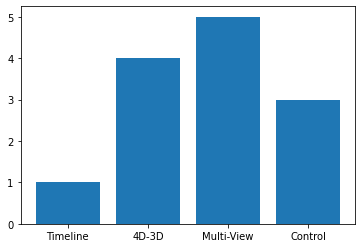

In [6]:
# Graphing
d = SHAPE_correct_per_rep(data)
x = d.keys()
y = d.values()
plt.bar(x, y)

### Analysis of Rotation Matching

In [7]:
# Analysis Functions

# Test Parameters
test_count = 5

# Jaccard Index
def jaccard_index(a, b):
    intersection = np.logical_and(a, b)
    union = np.logical_or(a, b)
    return np.sum(intersection) / np.sum(union)

# Jaccard index of rotation boolean arrays to measure the accuracy per representation
def ROTATE_jaccard_per_rep(data):
    index = {}
    # iterate through each representation
    # assign its jaccard index to 0
    for rep, v in data.items():
        index[rep] = 0

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):
            
            # Get loaded and selected rotations
            a = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])
            b = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"])

            # Jaccard Index
            index[rep] += jaccard_index(a, b)

    return index

# The average jaccard index for each representation
def ROTATE_average_jaccard_per_rep(data):
    d={}
    for rep, v in ROTATE_jaccard_per_rep(data).items():
        d[rep] = v/test_count
    return d

# The number of totally correct answers
def ROTATE_totally_correct_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):

            # Get loaded and selected rotations
            a = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])
            b = np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Selected Rotation"])

            if np.array_equiv(a, b):
                count[rep] += 1
                
    return count

# The number of planes of rotation per test
def ROTATE_number_of_rotations_per_test(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = []

        # for each test, find the Jaccard index and add it to count
        for i in range(test_count):
            # Get loaded and selected rotations
            count[rep].append( np.count_nonzero(np.array(v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Loaded Rotation"])) )
    
    return count

# The average time per representation
def ROTATE_average_time_per_rep(data):
    average_time = {}
    # iterate through each representation
    # initialise average time per representation
    for rep, v in data.items():
        sum = 0

        # sum up the time for the representation
        for i in range(test_count):
            sum += v["Rotation_Match"]["Rotation_Match{0}".format(i)]["Time"]

        average_time[rep] = sum/test_count
    return average_time

In [8]:
# Call Functions

# The correctness of loaded and selected rotations per representation
print("The Jaccard index of rotation boolean arrays per representation:", ROTATE_jaccard_per_rep(data))
print("The Average Jaccard index per representation:                   ", ROTATE_average_jaccard_per_rep(data))
print("The number of correct answers per representation:               ", ROTATE_totally_correct_per_rep(data))

# was there continuous improvement with each new representation
#   (Overlay the graphs)

# use number of planes of rotation to weight effectiveness of representations
print("The number of planes of rotation per test:                      ", ROTATE_number_of_rotations_per_test(data))

# Average times per representation
print("The average time per representation:                            ", ROTATE_average_time_per_rep(data))
# The average time for correct answers
# The average time for incorrect answers

# Correlations
# Is there a correlation between "Loaded Shape" and "Can you relate this to a 2D Cross Section of a 3D Shape" Survey Question
# Is there a correlation between correctness and "Loaded Shape"
# Is there a correlation between correctness and "Loaded Texture"
# Is there a correlation between confidence and "Loaded Shape"
# Is there a correlation between confidence and time taken
# Is there a correlation between confidence and representation
# Is there a correlation between confidence and correctness
# Is there a correlation between incorrect answers and 3D rotation
#   (Does it confuse things even more when combined with 4D rotation)

The Jaccard index of rotation boolean arrays per representation: {'Timeline': 2.0, '4D-3D': 0.0, 'Multi-View': 0.8333333333333333, 'Control': 0.75}
The Average Jaccard index per representation:                    {'Timeline': 0.4, '4D-3D': 0.0, 'Multi-View': 0.16666666666666666, 'Control': 0.15}
The number of correct answers per representation:                {'Timeline': 2, '4D-3D': 0, 'Multi-View': 0, 'Control': 0}
The number of planes of rotation per test:                       {'Timeline': [2, 1, 1, 3, 1], '4D-3D': [1, 2, 1, 1, 3], 'Multi-View': [2, 2, 1, 1, 2], 'Control': [1, 2, 3, 1, 1]}
The average time per representation:                             {'Timeline': 47.8818603515625, '4D-3D': 31.650146484375, 'Multi-View': 16.510205078125, 'Control': 7.665478515625}


<BarContainer object of 4 artists>

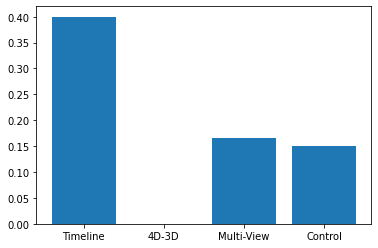

In [9]:
# Graphing
d = ROTATE_average_jaccard_per_rep(data)
x = d.keys()
y = d.values()
plt.bar(x, y)

### Analysis of Pose Matching

In [21]:
# Analysis Functions

# Test Parameters
test_count = 3

# Angle in Degrees
def rad_deg(x):
    return (x/(2*math.pi) ) *360

# The number of correct answers per representation
def SHAPE_correct_per_rep(data):
    count = {}
    # iterate through each representation
    # assign its correct answer count to 0
    for rep, v in data.items():
        count[rep] = 0

        # for each test, if the answer was correct 
        # add it to the correct answer count
        for i in range(test_count):

            # Loaded shape may have extended parameters (e.g ConeW)
            # But respondent only has option "Cone"
            if v["Shape_Match"]["Shape_Match{0}".format(i)]["Selected Shape"] in \
               v["Shape_Match"]["Shape_Match{0}".format(i)]["Loaded Shape"]:
                count[rep] += 1
    return count

def POSE_average_accuracy_per_rep(data):
    average = {}
    # iterate through each representation
    # assign its average to 0
    for rep, v in data.items():
        average[rep] = 0

        # for each test, add the accuracy
        for i in range(test_count):

            # Find the difference between the rotor of the main object and the match object
            a = v["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"]
            ra = Rotor.Rotor4()
            ra.constructor(a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7])

            b = v["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"]
            rb = Rotor.Rotor4()
            rb.constructor(b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7])

            try:
                average[rep] += rad_deg( Rotor.Rotor4.difference(ra, rb) )
            except:
                average[rep] += 0
                
        # average the accuracy
        average[rep] /= test_count
    return average

def POSE_best_accuracy_per_rep(data):
    best = {}
    # iterate through each representation
    # assign its average to 0
    for rep, v in data.items():
        best[rep] = 0

        t = 360

        # for each test, add the accuracy
        for i in range(test_count):

            # Find the difference between the rotor of the main object and the match object
            a = v["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"]
            ra = Rotor.Rotor4()
            ra.constructor(a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7])

            b = v["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"]
            rb = Rotor.Rotor4()
            rb.constructor(b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7])

            try:
                d = rad_deg( Rotor.Rotor4.difference(ra, rb) )
            except:
                d = 0

            if (d < t):
                t = d
        
        best[rep] = t
    
    return best

def POSE_worst_accuracy_per_rep(data):
    worst = {}
    # iterate through each representation
    # assign its average to 0
    for rep, v in data.items():
        worst[rep] = 0

        t = 0

        # for each test, add the accuracy
        for i in range(test_count):

            # Find the difference between the rotor of the main object and the match object
            a = v["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"]
            ra = Rotor.Rotor4()
            ra.constructor(a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7])

            b = v["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"]
            rb = Rotor.Rotor4()
            rb.constructor(b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7])

            try:
                d = rad_deg( Rotor.Rotor4.difference(ra, rb) )
            except:
                d = 0

            if (d > t):
                t = d
        
        worst[rep] = t
    
    return worst

def POSE_accuracy_data_per_rep(data):
    d = {}
    for rep, v in data.items():

        d[rep] = []

        for i in range(test_count):

            a = v["Pose_Match"]["Pose_Match{0}".format(i)]["Main Rotor"]
            ra = Rotor.Rotor4()
            ra.constructor(a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7])

            b = v["Pose_Match"]["Pose_Match{0}".format(i)]["Match Rotor"]
            rb = Rotor.Rotor4()
            rb.constructor(b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7])

            try:
                angle = rad_deg( Rotor.Rotor4.difference(ra, rb) )
            except:
                angle = 0
            d[rep].append(angle)

    return d

def POSE_average_time_per_rep(data):
    pass

def POSE_average_initial_difference_rep(data):
    pass

In [25]:
# Call Functions

print("The average accuracy per representation:    ", POSE_average_accuracy_per_rep(data))
print("The best Accuracy per representation:       ", POSE_best_accuracy_per_rep(data))
print("The worst Accuracy per representation:      ", POSE_worst_accuracy_per_rep(data))
#print("The accuracy data per representation:       ", POSE_accuracy_data_per_rep(data))

# was there continuous improvement with each new representation
#   (Overlay the graphs)

# The average Time per representation

# Correlation
# Is there a correlation between Time taken and "How easy did you find it"
# Is there a correlation between Time taken and "Accuracy"
#   (Assuming No, unless ran out of time?)
# Is there a correlation between "Accuracy" and "How easy did you find it"
# Is there a correlation between "Loaded Shape" and "Accuracy"
# Is there a correlation between "Loaded Texture" and "Accuracy"
# Is there a correlation between "Slider Count" and "Initial Match Rotor" position

The average accuracy per representation:     {'Timeline': 116.79137431286695, '4D-3D': 60.213447950368845, 'Multi-View': 61.67170451583335, 'Control': 107.68953310934376}
The best Accuracy per representation:        {'Timeline': 85.0386842761908, '4D-3D': 32.236036594958314, 'Multi-View': 22.773998101445102, 'Control': 86.80672303428926}
The worst Accuracy per representation:       {'Timeline': 146.12179871876808, '4D-3D': 75.7492277995835, 'Multi-View': 135.92267024378992, 'Control': 127.39156172889128}
The accuracy data per representation:        {'Timeline': [85.0386842761908, 146.12179871876808, 119.21363994364195], '4D-3D': [32.236036594958314, 75.7492277995835, 72.6550794565647], 'Multi-View': [26.31844520226501, 135.92267024378992, 22.773998101445102], 'Control': [86.80672303428926, 127.39156172889128, 108.8703145648507]}


([<matplotlib.axis.XTick at 0x7fad7e4051c0>,
 [Text(1, 0, 'Timeline'),
  Text(2, 0, '4D-3D'),
  Text(3, 0, 'Multi-View'),
  Text(4, 0, 'Control')])

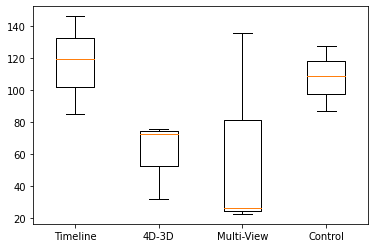

In [28]:
# Graphing
d = [i for i in POSE_accuracy_data_per_rep(data).values()]
plt.boxplot( d )
plt.xticks([1, 2, 3, 4], order)